<a href="https://colab.research.google.com/github/PatriciaPedersen/IMDB2/blob/main/IMDB_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for text processing
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# to display images
from skimage import io

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [3]:
df = pd.read_csv('../content/movies.csv')

In [4]:
#Initial data analysis: what does the data look like?
# How does the data look like?
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


In [5]:
#How big is data?
df.shape

(722685, 20)

In [6]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722685 entries, 0 to 722684
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722685 non-null  int64  
 1   title                 722681 non-null  object 
 2   genres                511960 non-null  object 
 3   original_language     722685 non-null  object 
 4   overview              604173 non-null  object 
 5   popularity            722685 non-null  float64
 6   production_companies  337213 non-null  object 
 7   release_date          670538 non-null  object 
 8   budget                722685 non-null  float64
 9   revenue               722685 non-null  float64
 10  runtime               688261 non-null  float64
 11  status                722685 non-null  object 
 12  tagline               108201 non-null  object 
 13  vote_average          722685 non-null  float64
 14  vote_count            722685 non-null  float64
 15  

In [7]:
# Are there any missing values?
df.isnull().sum()

id                           0
title                        4
genres                  210725
original_language            0
overview                118512
popularity                   0
production_companies    385472
release_date             52147
budget                       0
revenue                      0
runtime                  34424
status                       0
tagline                 614484
vote_average                 0
vote_count                   0
credits                 225002
keywords                512320
poster_path             185008
backdrop_path           499950
recommendations         687901
dtype: int64

In [8]:
# Are there duplicate values?
df.duplicated().sum()

0

Observations 👀
1. There are more than 7 lakh rows and 20 columns
2. Data consists of 6 numeric columns and 14 object/string columns
3. There are many columns with lots of missing valuest
4. There are duplicate values present in data

Preprocessing

In [9]:
# lets get rid of the duplicate values
df.drop_duplicates(inplace=True)

In [10]:
df['title'].duplicated().sum()

147336

In [11]:
df[['title','release_date']].duplicated().sum()

62569

In [12]:
# lets get rid of the duplicate movies
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [13]:
df.shape

(660116, 20)

In [14]:
# filtering the movies
df1 = df[df.vote_count >= 20].reset_index()

In [15]:
df1.isnull().sum()

index                       0
id                          0
title                       0
genres                    167
original_language           0
overview                  443
popularity                  0
production_companies     3550
release_date                1
budget                      0
revenue                     0
runtime                     8
status                      0
tagline                 20922
vote_average                0
vote_count                  0
credits                   667
keywords                 9825
poster_path               117
backdrop_path            2143
recommendations         18678
dtype: int64

In [16]:
# Replace the Nan with ''
df1.fillna('', inplace=True)

We are making content based recommendation system and genres , overview are very important to find similar movies. So i will delete movies which don't have genres and overview.

In [17]:
# finding index with '' genres and overview
index = df1[(df1['genres']=='') & (df1['overview']=='')].index

In [ ]:
# droping those index
df1.drop(index, inplace=True)

genres, keywords and credits are seperated by '-'
So replacing that with space
and from credits only extracting first values words

In [18]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

Creating Tags:

In [19]:
df1['tags'] = df1['overview'] +' '+ df1['genres'] +' '+ df1['keywords'] +' '+ df1['credits'] +' '+ df1['original_language']

In [20]:
df1.tags[0]

'An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival. Action Science Fiction Horror based on novel or book sequel kaiju JasonStatham WuJing ShuyaSophiaCai SergioPeris Mencheta en'

![](http://)Let's apply stemming on tags column

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.
</div>

In [21]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []

    for i in text.split():
        y.append(stemmer.stem(i))

    return ' '.join(y)

df1['tags'] = df1['tags'].apply(stem)

In [22]:
# Removing punctuation
df1['tags'] = df1['tags'].str.replace('[^\w\s]','')

📌   TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [23]:
tfidf = TfidfVectorizer(stop_words='english')

In [24]:
tfidf_matrix = tfidf.fit_transform(df1['tags'])

In [25]:
df1.tags[0]

'an exploratori dive into the deepest depth of the ocean of a dare research team spiral into chao when a malevol mine oper threaten their mission and forc them into a highstak battl for survival action scienc fiction horror base on novel or book sequel kaiju jasonstatham wuje shuyasophiacai sergioperi mencheta en'

Recommendation System

In [32]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass



    print('Recommendations\n')

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]

    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

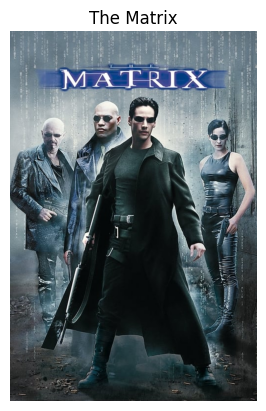

Recommendations



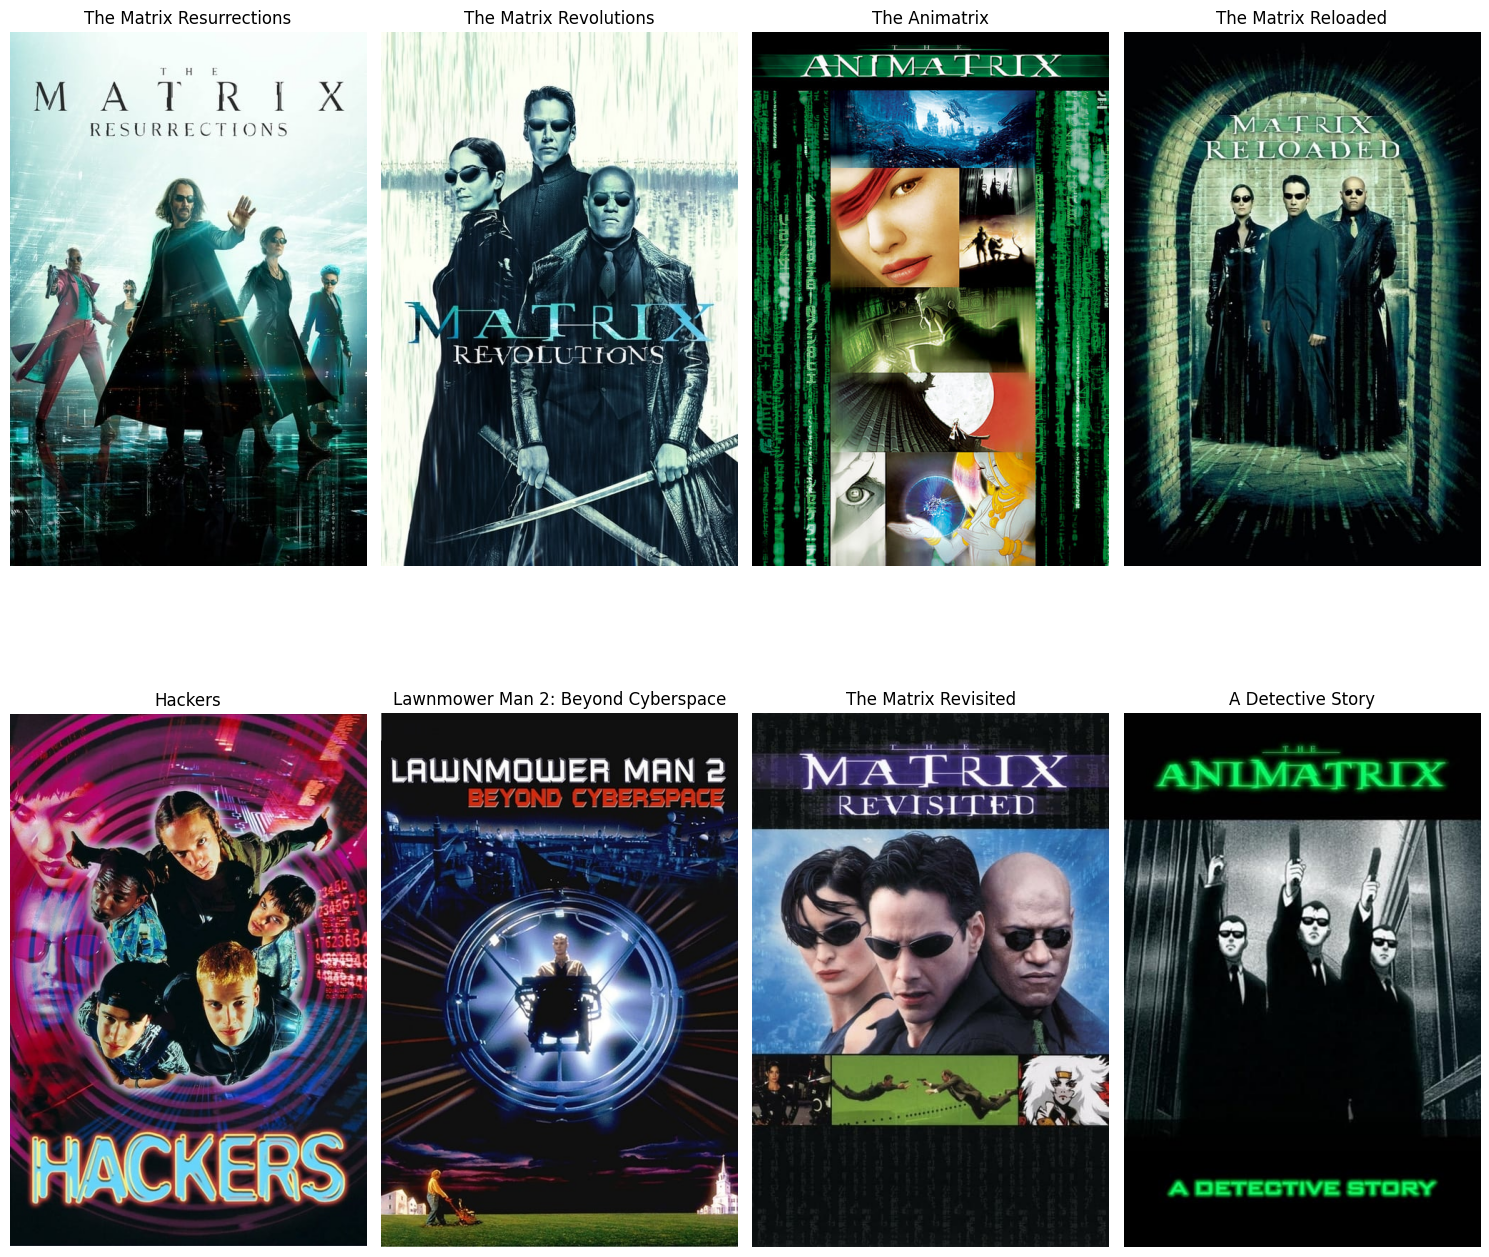

In [33]:
get_recommendations("The Matrix")

In [34]:
pickle.dump(df1,open('movie_list.pkl','wb'))
pickle.dump(tfidf_matrix,open('tfidf_matrix.pkl','wb'))

Deployment